In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
from utils import *
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_df = data_df[data_df["minute"] > "09:30:00"] 

In [23]:
# filter1 = (data_df["index_minchange"] < 0.005) & (data_df["index_minchange"] > 0.0025)
# filter2 = (data_df["index_minchange3"] < 0.01) & (data_df["index_minchange3"] > 0.008)
# filter1 = (data_df["index_minchange"] > 0.0035) | (data_df["index_minchange"] < -0.0025) 
filter2 = (data_df["index_minchange3"] < 0.01) & (data_df["index_minchange3"] > 0.005)
valid_df = data_df[filter2]
valid_df = valid_df.sort_values("minute")
valid_df = valid_df.groupby("date").first()
result(valid_df)

(0.6451612903225806, 31, 1.011668342388613)

In [52]:
# filter3 = (data_df["top_minchange"] > 0.005) & (data_df["top_minchange"] < 0.01)
# filter4 = (data_df["top_minchange"] > -0.009) & (data_df["top_minchange"] < -0.006)
# filter3 = (data_df["top_change"] > 1.05)
# filter3 = (data_df["top_minchange"] > 0.004) & (data_df["top_minchange"] < 0.005)
filter3 = (data_df["top_minchange3"] > 0.012)


valid_df = data_df[filter3]
valid_df = valid_df.sort_values("minute")
valid_df = valid_df.groupby("date").first()
result(valid_df)

(0.5652173913043478, 69, 1.0155321845919567)

In [25]:
valid_df = data_df[(filter3 | filter4) | (filter1 | filter2)]
valid_df = valid_df.sort_values("minute")
valid_df = valid_df.groupby("date").first()
result(valid_df)

(0.5616438356164384, 73, 1.002673736319685)

# 指数效应

In [7]:
win_ratio_se = pd.Series()
mean_se = pd.Series()
for i in range(-20,20):
    low = float(i)/2000.0
    upper = float(i)/2000.0 + 1.0/2000.0
    sub_df = data_df[(data_df["index_minchange"] < upper) & (data_df["index_minchange"] > low)]
    valid_df = sub_df.sort_values("minute")
    if len(valid_df) == 0:
        continue
    valid_df = valid_df.groupby("date").first()
    win_ratio,count,mean = result(valid_df)
    print (upper + low)/2,count,mean
    win_ratio_se[(upper + low)/2] = win_ratio
    mean_se[(upper + low)/2] = mean

-0.00375 1 1.04697986577
-0.00325 2 0.978153006113
-0.00275 4 1.0447350376
-0.00225 17 0.991206366045
-0.00175 40 0.978750356703
-0.00125 164 0.99763550226
-0.00075 406 0.990140896374
-0.00025 481 0.994013167777
0.00025 480 0.995133831802
0.00075 439 0.994287857232
0.00125 211 0.998569009217
0.00175 95 1.0051905645
0.00225 32 0.998109148048
0.00275 18 0.977477431444
0.00325 10 0.995938508219
0.00375 6 1.01336047229
0.00425 1 1.04532577904
0.00625 1 1.03052503053


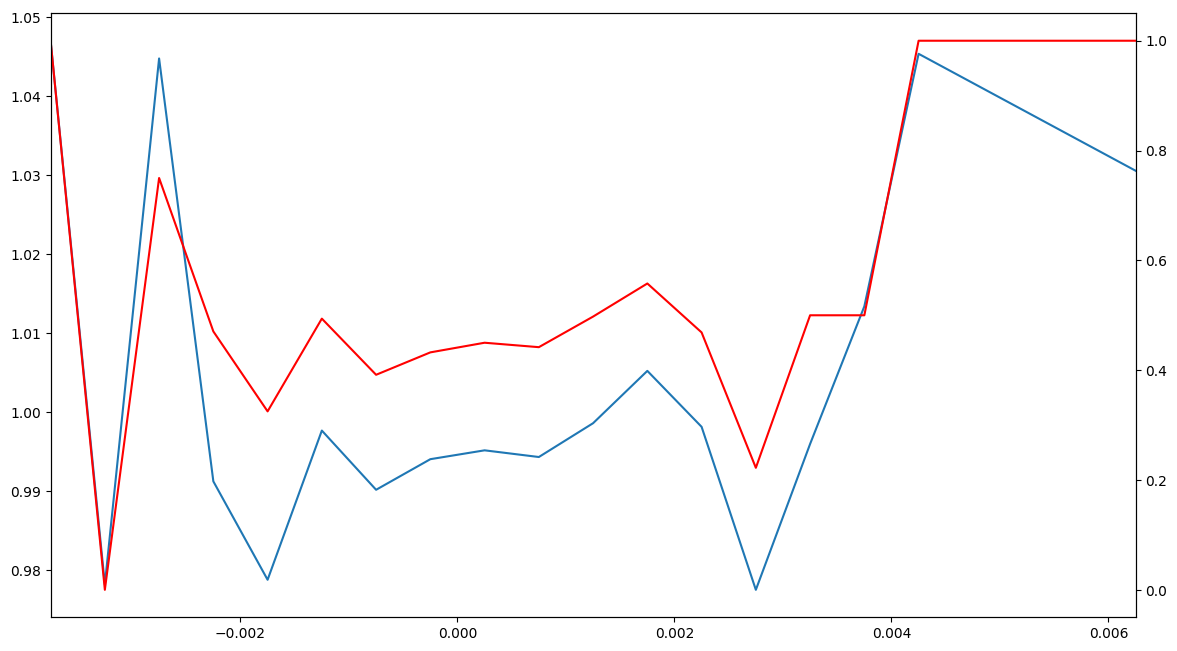

In [8]:
fig, ax = plt.subplots(figsize=(14,8))
ax2 = ax.twinx()
# ax.scatter(x=data_df["index_minchange"],y=data_df["change"],alpha=0.3,s=3)
mean_se.plot(ax=ax)
win_ratio_se.plot(ax = ax2,c="r")

In [18]:
win_ratio_se = pd.Series()
mean_se = pd.Series()
for i in range(-20,20):
    low = float(i)/1000.0
    upper = float(i)/1000.0 + 1.0/1000.0
    sub_df = data_df[(data_df["index_minchange3"] < upper) & (data_df["index_minchange3"] > low)]
    valid_df = sub_df.sort_values("minute")
    valid_df = valid_df.groupby("date").first()
    if len(valid_df) < 3:
        continue
    win_ratio,count,mean = result(valid_df)
    print (upper + low)/2,count,mean
    win_ratio_se[(upper + low)/2] = win_ratio
    mean_se[(upper + low)/2] = mean

-0.0055 6 0.99776813485
-0.0045 13 1.00540723038
-0.0035 44 0.971826543203
-0.0025 173 0.987712264912
-0.0015 394 0.992186145253
-0.0005 480 0.992721880265
0.0005 480 0.998029872843
0.0015 444 0.997063999081
0.0025 267 0.998970357004
0.0035 129 0.997978218478
0.0045 52 0.994965118072
0.0055 25 1.01620999044
0.0065 10 0.998468469613


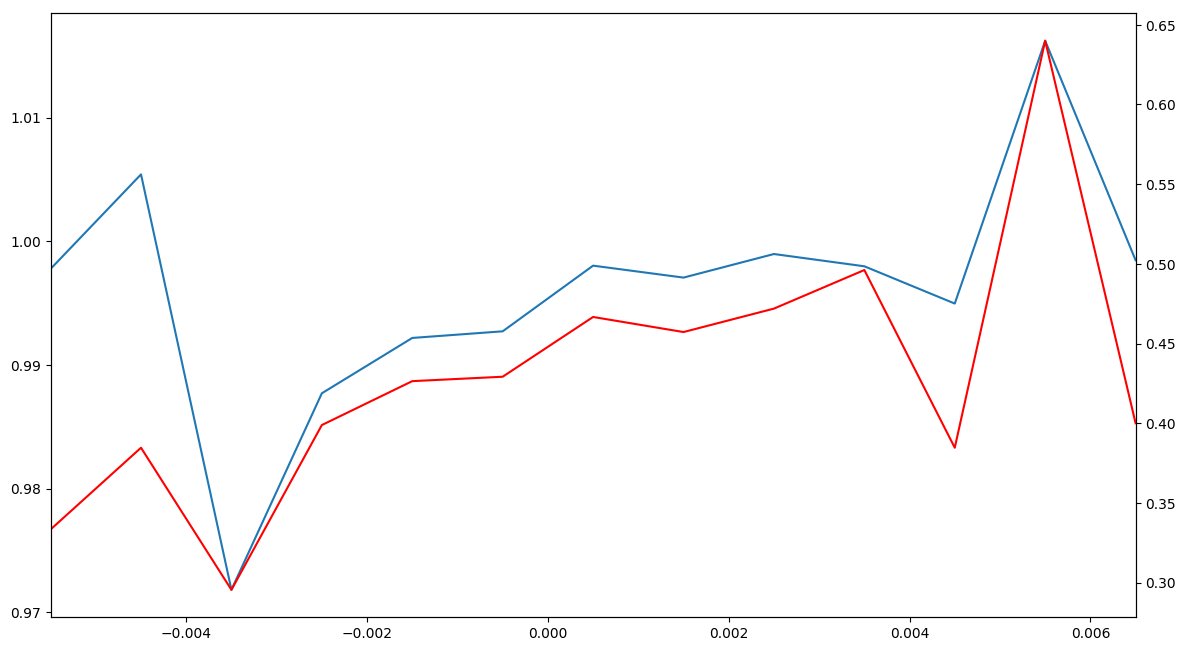

In [19]:
fig, ax = plt.subplots(figsize=(14,8))
ax2 = ax.twinx()
# ax.scatter(x=data_df["index_minchange"],y=data_df["change"],alpha=0.3,s=3)
mean_se.plot(ax=ax)
win_ratio_se.plot(ax = ax2,c="r")

呈现M形！～～！！

## 赚钱效应

In [28]:
win_ratio_se = pd.Series()
mean_se = pd.Series()
for i in range(-10,15):
    low = float(i / 2)/100.0 + 1.0
    upper = float(i / 2)/100.0 + 1.0/200.0 + 1.0
    sub_df = data_df[(data_df["top_change"] < upper) & (data_df["top_change"] > low)]
    valid_df = sub_df.sort_values("minute")
    valid_df = valid_df.groupby("date").first()
    if len(valid_df) < 3:
        continue
    win_ratio,count,mean = result(valid_df)
    print (upper + low)/2,count,mean
    win_ratio_se[(upper + low)/2] = win_ratio
    mean_se[(upper + low)/2] = mean

0.9625 4 0.983417099501
0.9625 4 0.983417099501
0.9725 8 1.01578945102
0.9725 8 1.01578945102
0.9825 25 0.987105856599
0.9825 25 0.987105856599
0.9925 69 0.992316438698
0.9925 69 0.992316438698
1.0025 183 0.992119629175
1.0025 183 0.992119629175
1.0125 287 0.997661396604
1.0125 287 0.997661396604
1.0225 275 0.998677502977
1.0225 275 0.998677502977
1.0325 193 1.00474638469
1.0325 193 1.00474638469
1.0425 81 0.998352397871
1.0425 81 0.998352397871
1.0525 37 1.01551258734
1.0525 37 1.01551258734
1.0625 14 1.00286594578
1.0625 14 1.00286594578
1.0725 5 0.99554814226


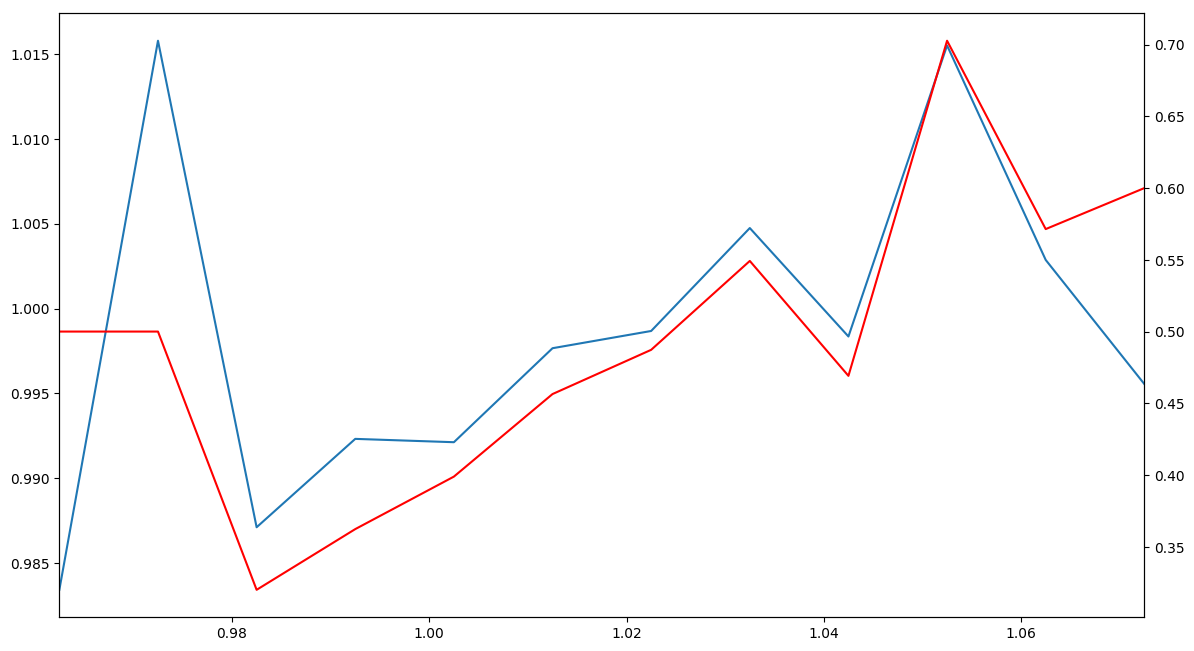

In [29]:
fig, ax = plt.subplots(figsize=(14,8))
ax2 = ax.twinx()
# ax.scatter(x=data_df["top_change"],y=data_df["change"],alpha=0.3,s=3)
mean_se.plot(ax=ax)
win_ratio_se.plot(ax = ax2,c="r")

In [30]:
data_df.head(3)

,change,date,last_day,stock,close0,high0,high_limit0,low0,open0,volume0,...,index_minlow,index_minchange3,index_minchange,recent,last_recent,st,isnew,top_change,top_minchange3,top_minchange
000001.XSHE_2013-01-14,1.001718,2013-01-14 00:00:00,2013-01-11 00:00:00,000001.XSHE,5.40,5.48,5.94,5.37,5.40,70536973.0,...,0.999280,-0.000464,-0.000109,1.0,1.0,False,0.0,1.038424,-0.001085,0.000704
000001.XSHE_2013-01-28,1.011158,2013-01-28 00:00:00,2013-01-25 00:00:00,000001.XSHE,6.62,7.00,7.51,6.57,6.82,251913470.0,...,1.000790,-0.000855,-0.000402,1.0,1.0,False,0.0,1.015714,-0.000432,-0.000147
000001.XSHE_2013-03-05,1.024570,2013-03-05 00:00:00,2013-03-04 00:00:00,000001.XSHE,7.85,7.91,8.61,7.61,7.80,304982156.0,...,0.996236,0.000585,0.000350,1.0,1.0,False,0.0,1.028587,-0.002467,-0.000526


In [31]:
win_ratio_se = pd.Series()
mean_se = pd.Series()
for i in range(-10,10):
    low = float(i )/1000.0 
    upper = float(i)/1000.0 + 1.0/1000
    sub_df = data_df[(data_df["top_minchange"] < upper) & (data_df["top_minchange"] > low)]
    valid_df = sub_df.sort_values("minute")
    valid_df = valid_df.groupby("date").first()
    if len(valid_df) < 3:
        continue
    win_ratio,count,mean = result(valid_df)
    print (upper + low)/2,count,mean
    win_ratio_se[(upper + low)/2] = win_ratio
    mean_se[(upper + low)/2] = mean

-0.0075 4 1.01198250696
-0.0055 5 0.994758777989
-0.0045 22 0.989161926592
-0.0035 53 0.98309241184
-0.0025 150 0.987304014918
-0.0015 420 0.993177082588
-0.0005 480 0.99864101684
0.0005 481 0.995769960279
0.0015 451 0.994846739884
0.0025 253 0.99600564662
0.0035 90 0.994675244739
0.0045 50 1.01098877912
0.0055 23 0.997709088909
0.0065 7 0.975296326253
0.0075 4 1.01086311794


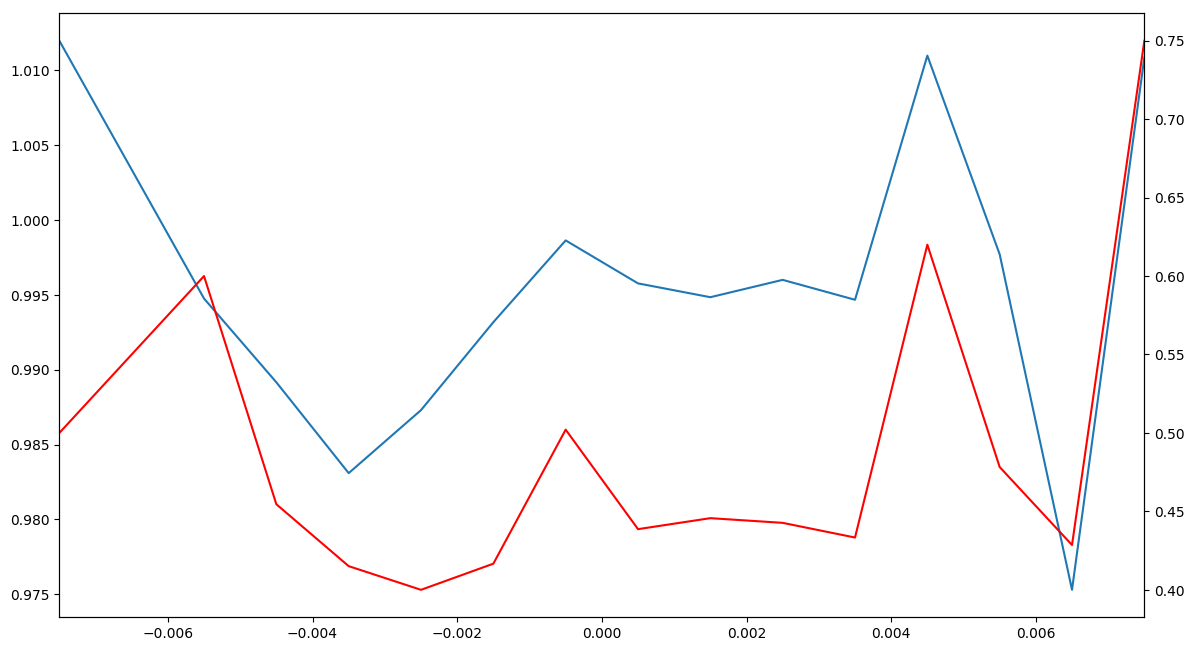

In [32]:
fig, ax = plt.subplots(figsize=(14,8))
ax2 = ax.twinx()
mean_se.plot(ax=ax)
win_ratio_se.plot(ax = ax2,c="r")

In [17]:
data_df = data_df[data_df["minute"] > "09:33:00"]

In [44]:
win_ratio_se = pd.Series()
mean_se = pd.Series()
for i in range(-10,10):
    low = float(i )/1000.0 
    upper = float(i)/1000.0 + 1.0/1000
    sub_df = data_df[(data_df["top_minchange3"] < upper) & (data_df["top_minchange3"] > low)]
    valid_df = sub_df.sort_values("minute")
    valid_df = valid_df.groupby("date").first()
    if len(valid_df) < 3:
        continue
    win_ratio,count,mean = result(valid_df)
    print (upper + low)/2,count,mean
    win_ratio_se[(upper + low)/2] = win_ratio
    mean_se[(upper + low)/2] = mean

-0.0095 16 0.994004278731
-0.0085 25 0.979653098138
-0.0075 21 0.976418659615
-0.0065 41 0.987561771068
-0.0055 70 0.990728377987
-0.0045 115 0.999755366195
-0.0035 218 0.985871065594
-0.0025 343 0.990780012527
-0.0015 453 0.99596105183
-0.0005 475 0.996141937516
0.0005 471 0.995859742365
0.0015 470 0.996520353239
0.0025 407 0.996508842293
0.0035 319 0.991365152155
0.0045 191 0.994196287666
0.0055 113 0.998973291153
0.0065 74 1.00411686284
0.0075 46 1.002967917
0.0085 27 0.999957371805
0.0095 23 1.02572109784


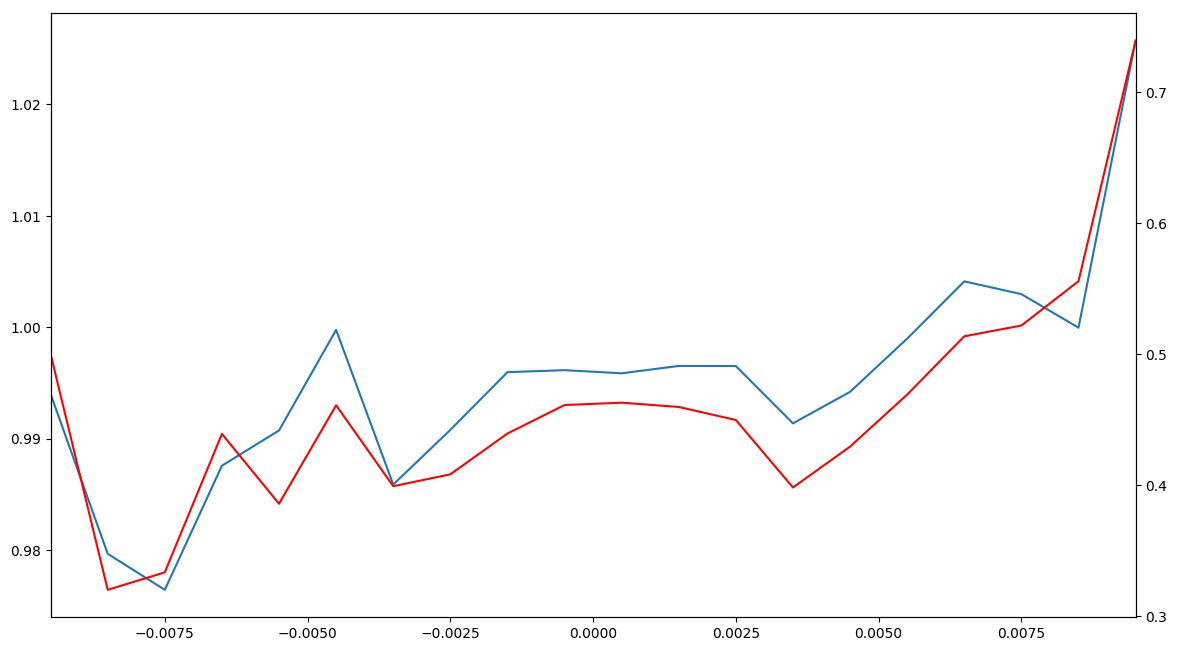

In [45]:
fig, ax = plt.subplots(figsize=(14,8))
ax2 = ax.twinx()
mean_se.plot(ax=ax)
win_ratio_se.plot(ax = ax2,c="r")